<a href="https://colab.research.google.com/github/beamscource/colab_notebooks/blob/main/ml_nlp_advanced_neural_architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Differences between MLP, CNN, and RNN**

An **MLP (multi-layer perceptron)** is a fully connected (FC) network also often referred to as a **feed-forward neural network**.

MLPs are common in simple classification and linear regression problems. However, MLPs are not optimal for processing  multi-dimensional (e.g., images, videoframes, spectrogramms) and sequential (e.g., text, time series) data patterns.

For multi-dimensional data like images and videos, **convolutional neural networks (CNNs)** excel in extracting feature maps for classification, segmentation, generation, and other downstream tasks.

For sequential data input, **recurrent neural networks (RNNs)** are (were before the advent of **Transformers**) popular, because their internal design allows
the network to discover dependency in the history of the data, which is useful
for prediction.

In some cases, a **CNN** in the form of a 1D convolution is also used for networks with sequential input data. However, in most deep learning models, MLP and CNN or RNN are combined to make the most out of each network.

Newest speech models (e.g., wav2vec2.0 https://towardsdatascience.com/wav2vec-2-0-a-framework-for-self-supervised-learning-of-speech-representations-7d3728688cae), use a combination of CNNs to learn sound representations and Transformer blocks for sequence modeling.

NOTE: **Despite some examples from other fields, this notebook focuses on examples from the NLP and speech domains.**



# Convolutional Neural Networks

**Vertical edge detection with CNNs**

See https://www.youtube.com/watch?v=XuD4C8vJzEQ&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF&index=2

In **computer vision** (CV) tasks, e.g. object detection, you need to detect object edges (boundaries, color and light transisions) in images.

Classically, this was done by manually defining a filter (a matrix) which is applied using a convolution operator on the input matrix (i.e., pixel values). In this way defined filter matrixes have mostly an odd length size.

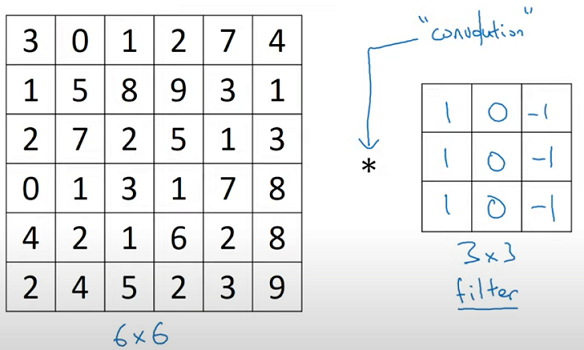

Instead of hard-coded filters, in a convolutional network the filter matrix is a set of trainable parameters (weights). As such, filters can be understood as vertical, horizontal or diagonal **edge detectors**.

This is an example of an 6x6 input image which is convolved by a 3x3 filter which results in a 4x4 "compressed" image.

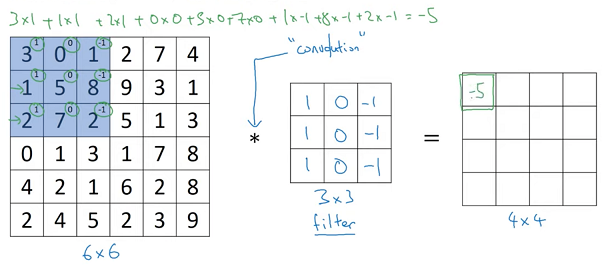

**Padding**

There are several mechanisms which allow to controll the size of the output image. Padding allows to keep the original dimensions of the input image and to keep pixal information from the image edges in the network.

With padding equal to 1, a 6x6 input image is transformed to a 8x8 image before passing the convolution operation such that the "compressed" image has now the size of 6x6.

The general formula fo compute the dimensions of the resulting image is n + 2p - f + 1 for nxn as the size of the input image, fxf is the size of the filter, and p is the number of additional pixels that is added on each side of the input image. By convention padding is done with zeros.

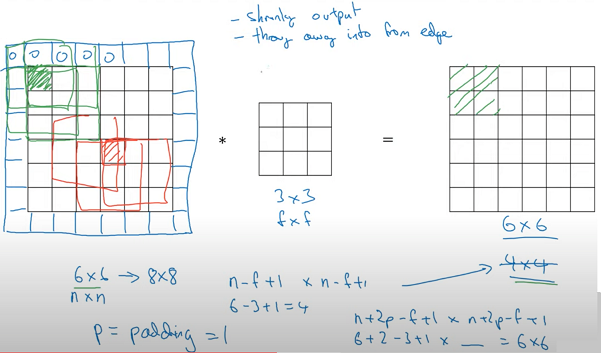

Traditionally, we speak of "valid" convolutions when no padding is applied to the input image, and of "same" convolutions when padding is applied such that the size of output image is equal to the side of the original image. To compute the required padding we can apply the following formula: p = f - 1 / 2.

**Strided convolutions** allow to "skip" pixes when applying the convolution operation. The full equation to compute the dimension of the resulting image is floor[(n + 2p - f) / s + 1] where s is the number of pixels which are skipped at each step when the filter is moved across the input image.

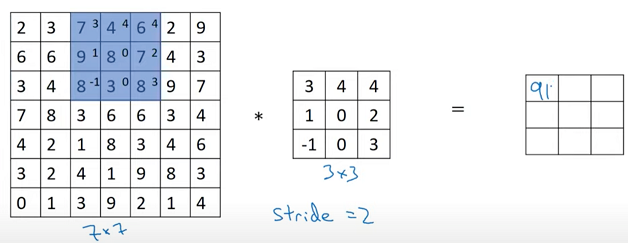

**Color images and multiple filters**

When dealing with **color images** we have a "three-dimensional" arrays as we have three channels where each corresponds to a color (read, green, blue - RGB).

We can say that in the case of RGB images, convolutions are performed on volumes. During convolution, the filter slides over the 2-D surface of each channel and across different color channels:

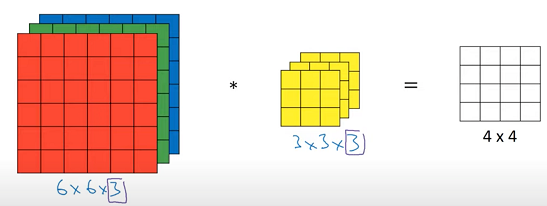

You can have multiple filters (a free to chose parameters) to detect edges in multiple directions.

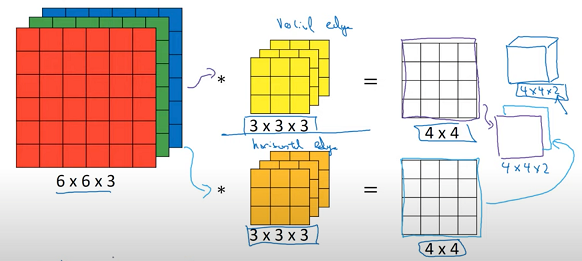

**Pooling**

Beside layers where convolutions are applied to the input features, there are also **pooling transformations** which allow to shrink the output size of the image. Traditionally in CNNs, **max pooling** is applied.

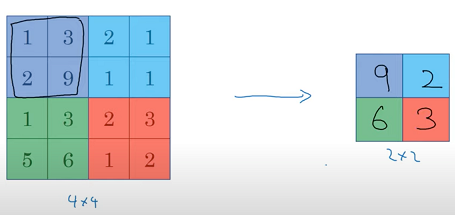

**Parameter sharing and sparsity**

There are two mechanisms which make CNNs powerful. First, we speak about **parameter sharing**. This is the idea that same filters (feature detectors) which are learned on one part of an image, are used to recognize edges in different parts of the image.

Second mechanism is of **sparsity of connections**. By that we mean that the output vaue of a convolution is not dependent on each pixel of the input image. This allows to build deeper CNNs in contrast to simple perceptrons (NNs based on matrix multiplication).

**Residual blocks**

Other ideas which allow to build even deeper CNNs are residual blocks which allow to skips convolutions.

**Tasks in computer vision**

The simplest task which can be solved with CNNs is **image classification**, i.e. recognizing the general class of an image. For instance, depicts an image A a dog or a cat.

Another important task in CV is **object detection** which involes recognizing and tagging (output a boundary) potentially multiple objects in an image. Object recognition as task implies also object localization, identifying in which part of the image a target object is located.

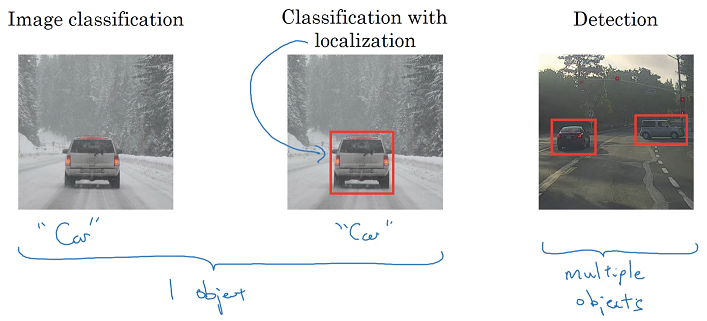

In a more traditional approach, you first train a network (or even a simpler linear model) on cropped images of target objects (e.g., cars). Secondly, you can implement a slinding window across a bigger input image and have the trained network classify whether there is a target object (a car) within each window of the input image (target labels are 1,0).

figure

There are computational downsides to that approach. Instead, we can use CNNs to detect obects in each image in a single "run". detection with convolutions

Evaluation of the bounding box - intersection of the union

figure

Non-max suppresion to stop multiple detection of the same object

Anchor boxes allow to identify obejt which overlaps across different sliding windows

**Face verification and face recognition**

verification is easier because we have to decide on a single image whether the person is in your data base (compare two images): input image vs each image from the data base

**One-shot learning**

just a single example for learning, learn a difference function for an image
this is done with siamease networks

take image and buid an "encoding" with a CNN
take a second image and encode it with the same network
compare both embeddings with distance/difference measure

Learn parameters to output close encodings for pairs of pictures for the same persons

triplet loss: anchor image vs positive example and anchor image vs negative example

**Object segmentation**

see https://medium.com/visionwizard/object-segmentation-4fc67077a678

# Recurrent Neural Networks

**Recurent neural network (RNN)**

LSTM (back propogation through time, attention)
https://youtu.be/DY82Goknf0s Go to 6:43

# Transformers

**Attention heads in a Transformer**

https://www.youtube.com/watch?v=yGTUuEx3GkA
 reweighting of data points to make some points more prominent ("smoothing" an data points array) - dot.product between the reweighing window and the original array

same idea applies to text: words around specific targets add context
but in linguistics we can not use only proximity as reweighing parameter
each word has a vector embedding and by applying a re-weghing procedure to each of them in a sentence, we add context

self-attention
for each word embedding calculate dot.product with each other embedding in a sentence (get scores)
all weights are normalized and sum to one (contextualized word embeddings)
single word embedding across the sentence have now some influence on each other

no trainable parameters so far!

https://www.youtube.com/watch?v=tIvKXrEDMhk
**Keys, Values, Queries**
keys == word embbeddings of all words
query == the target word which gets context
value == the contextualized word embeddings

add weights matrices to each non-trainable parameter and you can train those

https://www.youtube.com/watch?v=23XUv0T9L5c

multi-head attention
attention from the target word is spead acroos different word embeddings
several attention blocks (the number is not dependent on number of words)
multiple attention blocks which don't share weights across them and are trained in parallel
at the end we need to concatinate and pass the serult through a single dense layer

https://www.youtube.com/watch?v=EXNBy8G43MM
Transformer

- https://medium.com/nlplanet/two-minutes-nlp-20-learning-resources-for-transformers-1bbff88b7524

*Encoder-decoder* models (also called *sequence-to-sequence models*) use both parts of the Transformer architecture. At each stage, the attention layers of the encoder can access all the words in the initial sentence, whereas the attention layers of the decoder can only access the words positioned before a given word in the input.

The pretraining of these models can be done using the objectives of encoder or decoder models, but usually involves something a bit more complex. For instance, T5 is pretrained by replacing random spans of text (that can contain several words) with a single mask special word, and the objective is then to predict the text that this mask word replaces.

Sequence-to-sequence models are best suited for tasks revolving around generating new sentences depending on a given input, such as summarization, translation, or generative question answering.

Representatives of this family of models include:

- BART
- mBART
- Marian
- T5

# Multimodal networks

**Multimodal Networks**

see https://theaisummer.com/vision-language-models/